In [151]:
# standing data tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
# persistence
from sklearn.externals import joblib

plt.style.use('seaborn-white')
%matplotlib inline

In [152]:
#Load the filtered good dataset
mergeddata=pd.read_csv('../data/round2/batch1_usable_goodlist_corrmag.csv')
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 54 columns):
Unnamed: 0            1478 non-null int64
File                  1478 non-null object
Runtime(s)            1478 non-null int64
Fill Vol(mm^3)        1478 non-null int64
Support Vol(mm^3)     1478 non-null int64
Layer Height(mm)      1478 non-null float64
Mesh Volume(mm^3)     1478 non-null float64
X_x                   1478 non-null float64
Y_x                   1478 non-null float64
Z_x                   1478 non-null float64
BB Vol(mm^3)          1478 non-null float64
CVHull Vol(mm^3)      1478 non-null float64
Surface Area(mm^2)    1478 non-null float64
Euler                 1478 non-null int64
Load Time_x           1478 non-null float64
File Size_x           1478 non-null int64
Time_x                1478 non-null float64
Watertight            1478 non-null bool
Time.1                1478 non-null float64
X_y                   1478 non-null float64
Y_y                   1478 no

In [153]:
mergeddata.describe()

,Unnamed: 0,Runtime(s),Fill Vol(mm^3),Support Vol(mm^3),Layer Height(mm),Mesh Volume(mm^3),X_x,Y_x,Z_x,BB Vol(mm^3),...,Total Time,Load Time_y,File Size_y,Time_y,minz,down area,adj down area,ang down area,magic number,total time
count,1478.000000,1.478000e+03,1.478000e+03,1.478000e+03,1.478000e+03,1.478000e+03,1478.000000,1478.000000,1478.000000,1.478000e+03,...,1478.000000,1478.000000,1.478000e+03,1478.000000,1.478000e+03,1.478000e+03,1.478000e+03,1.478000e+03,1.478000e+03,1478.000000
mean,738.500000,6.476731e+04,4.625703e+04,8.437575e+03,1.000000e-01,4.811312e+04,69.937555,65.091137,43.177303,2.262443e+05,...,1.223175,0.107844,1.225992e+06,0.000031,7.264467e+00,6.477147e+03,4.701804e+04,6.126981e+03,3.497334e+04,0.131037
std,426.806162,1.482158e+05,8.834928e+04,7.132272e+04,2.790379e-15,9.143854e+04,36.934605,37.951409,35.049007,4.166599e+05,...,3.777754,0.138455,1.863061e+06,0.000007,6.605909e+01,1.059394e+05,1.490800e+05,1.059394e+05,1.300239e+05,0.174362
min,0.000000,6.240000e+02,4.080000e+02,2.300000e+01,1.000000e-01,6.620977e+02,6.000000,5.080000,1.001000,1.650186e+04,...,0.146367,0.001611,6.840000e+02,0.000010,-1.334074e+02,0.000000e+00,-1.910000e-12,0.000000e+00,-1.910000e-12,0.001986
25%,369.250000,1.412425e+04,1.000775e+04,3.900000e+01,1.000000e-01,1.013333e+04,42.007515,37.959757,15.742501,3.912583e+04,...,0.296855,0.021289,1.080590e+05,0.000026,0.000000e+00,1.049188e+03,8.166149e+01,8.172673e+02,2.675053e-01,0.024030
50%,738.500000,2.818700e+04,2.074350e+04,2.105000e+02,1.000000e-01,2.136508e+04,63.487210,56.008592,32.000000,8.109218e+04,...,0.513316,0.052801,4.216355e+05,0.000031,0.000000e+00,2.055400e+03,4.721152e+03,1.835601e+03,2.311820e+03,0.061925
75%,1107.750000,6.107525e+04,4.492475e+04,2.040250e+03,1.000000e-01,4.721263e+04,92.331730,83.975565,61.808551,2.145755e+05,...,1.057334,0.122997,1.425909e+06,0.000037,2.875000e-16,4.515881e+03,2.692866e+04,3.968142e+03,1.809138e+04,0.154111
max,1477.000000,2.927668e+06,1.271441e+06,1.832400e+06,1.000000e-01,1.268525e+06,186.600864,203.623337,187.111664,5.831149e+06,...,92.760275,0.835205,9.814584e+06,0.000050,1.468700e+03,4.060167e+06,2.015629e+06,4.060167e+06,1.942756e+06,1.048765


In [154]:
# Setup aliases
mergeddata.rename(columns={'Runtime(s)':'t','Fill Vol(mm^3)':'Vfil','Support Vol(mm^3)':'Vsup','Layer Height(mm)':'dh','Mesh Volume(mm^3)':'Vmes','BB Vol(mm^3)':'Vbb','CVHull Vol(mm^3)':'Vch','Surface Area(mm^2)':"Sa",'downward project SA':'DpSa'},inplace=True)
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 54 columns):
Unnamed: 0          1478 non-null int64
File                1478 non-null object
t                   1478 non-null int64
Vfil                1478 non-null int64
Vsup                1478 non-null int64
dh                  1478 non-null float64
Vmes                1478 non-null float64
X_x                 1478 non-null float64
Y_x                 1478 non-null float64
Z_x                 1478 non-null float64
Vbb                 1478 non-null float64
Vch                 1478 non-null float64
Sa                  1478 non-null float64
Euler               1478 non-null int64
Load Time_x         1478 non-null float64
File Size_x         1478 non-null int64
Time_x              1478 non-null float64
Watertight          1478 non-null bool
Time.1              1478 non-null float64
X_y                 1478 non-null float64
Y_y                 1478 non-null float64
Z_y                 1478 no

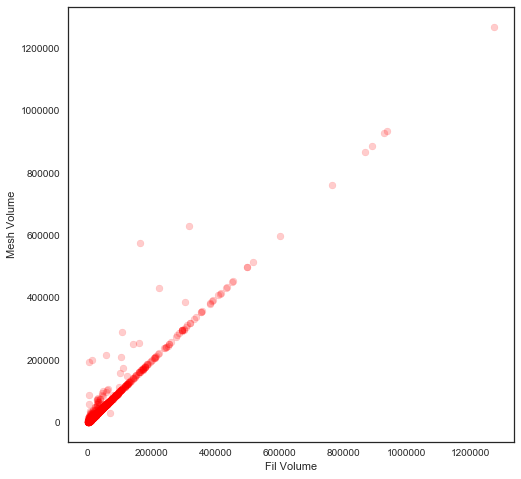

In [155]:
#uncut plots
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=200000
plt.scatter(mergeddata['Vfil'],mergeddata['Vmes'],color='red',alpha=0.2)
plt.xlabel('Fil Volume')
plt.ylabel('Mesh Volume')
#plt.xlim(0,xmax)
#plt.ylim(0,xmax)
#plt.savefig('fig/round2/explore_uncut_Vfil_vs_Vmes_train_4k.png')

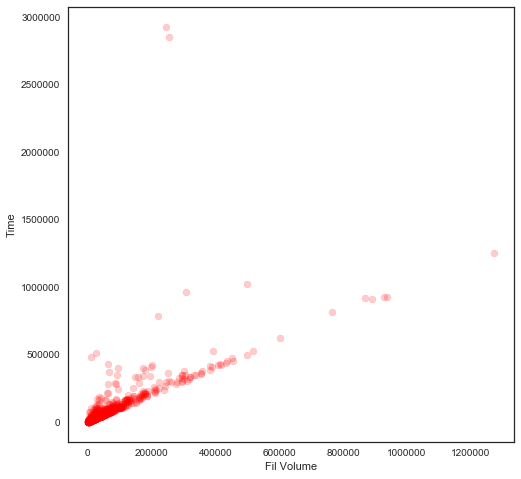

In [156]:
#uncut plots
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
#xmax=200000
plt.scatter(mergeddata['Vfil'],mergeddata['t'],color='red',alpha=0.2)
plt.xlabel('Fil Volume')
plt.ylabel('Time')
#plt.xlim(0,xmax)
#plt.ylim(0,xmax)
#plt.savefig('fig/round2/explore_uncut_Vfil_vs_t_train_4k.png')

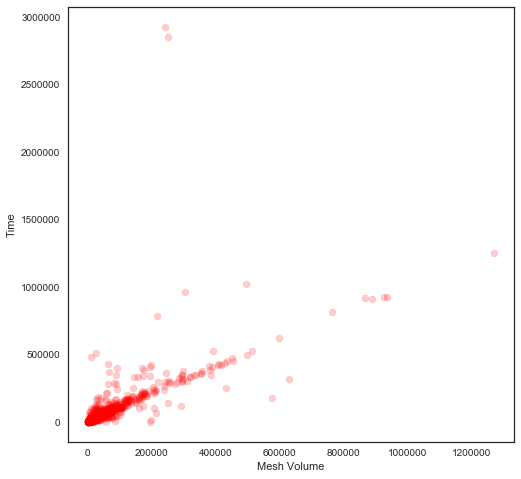

In [157]:
#uncut plots
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
#xmax=200000
plt.scatter(mergeddata['Vmes'],mergeddata['t'],color='red',alpha=0.2)
plt.xlabel('Mesh Volume')
plt.ylabel('Time')
#plt.xlim(0,xmax)
#plt.ylim(0,xmax)
#plt.savefig('fig/round2/explore_uncut_Vmes_vs_t_train_4k.png')

In [161]:
#clean up dataset
Vmax=1000000.
#cut=(mergeddata['Vmes']/mergeddata['Vfil']<2)
anafilter=(mergeddata['Vmes']<Vmax)&(mergeddata['Vbb']<Vmax)&(mergeddata['Vch']<Vmax)&(mergeddata['Watertight']==True)
#anafilter=(mergeddata['Vmes']<Vmax)&(mergeddata['Vch']<Vmax)&(mergeddata['Watertight']==True)
#anafilter=(mergeddata['Vbb']<Vmax)
data=mergeddata[anafilter]
#data=mergeddata[cut]
print len(data)
# test first on the training set
sd=data.head(1000)
print len(sd)

1407
1000


In [162]:
#save outliers
#outliers=mergeddata[cut==filter]
#print len(outliers)
#outliers.to_csv('../data/round2/batch1_usable_goodlist_outliers_Vmes_gt_Vfil.csv')
#outliers.to_csv('../data/round2/batch1_usable_goodlist_extreme_outliers_Vmes_gt_Vfil.csv')

(0, 200000)

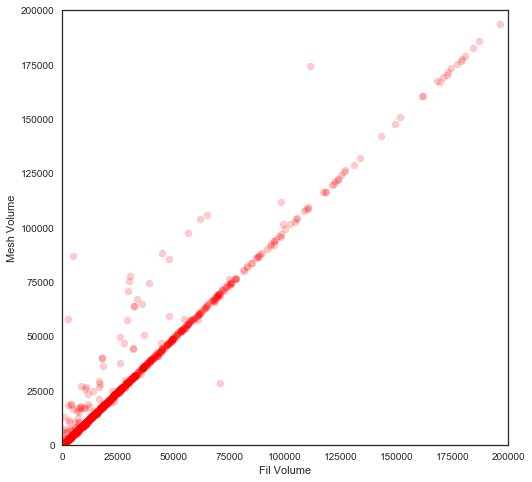

In [163]:
#after cleaning
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=200000
plt.scatter(sd['Vfil'],sd['Vmes'],color='red',alpha=0.2)
plt.xlabel('Fil Volume')
plt.ylabel('Mesh Volume')
plt.xlim(0,xmax)
plt.ylim(0,xmax)
#plt.savefig('fig/round2/explore_uncut_Vfil_vs_Vmes_train_4k.png')

(0, 200000)

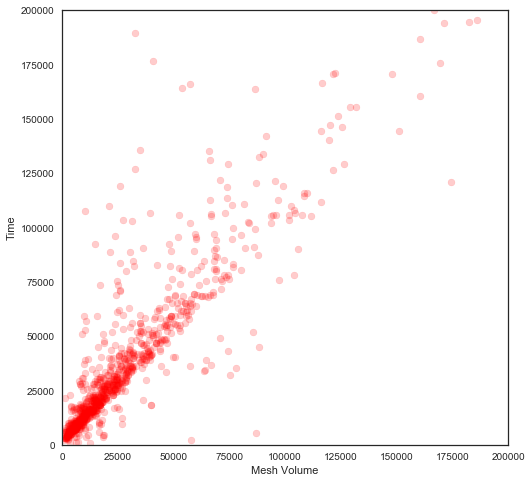

In [164]:
#after cleaning
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=200000
plt.scatter(sd['Vmes'],sd['t'],color='red',alpha=0.2)
plt.xlabel('Mesh Volume')
plt.ylabel('Time')
plt.xlim(0,xmax)
plt.ylim(0,xmax)
#plt.savefig('fig/round2/explore_uncut_Vmes_vs_t_train_4k.png')

(0, 100000)

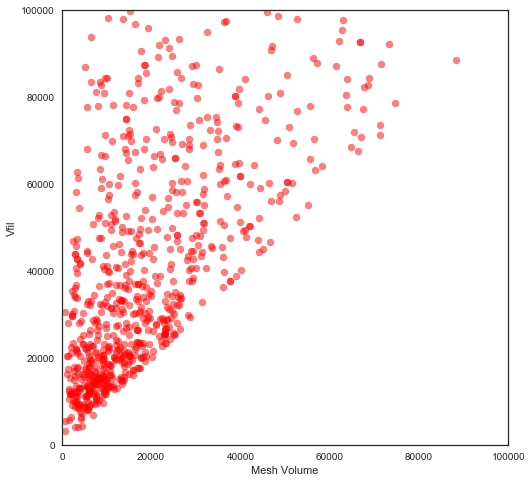

In [165]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
xmax=100000
plt.scatter(sd['Vmes'],sd['Vch'],color='red',alpha=0.5)
plt.xlabel('Mesh Volume')
plt.ylabel('Vfil')
plt.xlim(0,xmax)
plt.ylim(0,xmax)
#plt.savefig('t_vs_Vmes_train_4k.png')

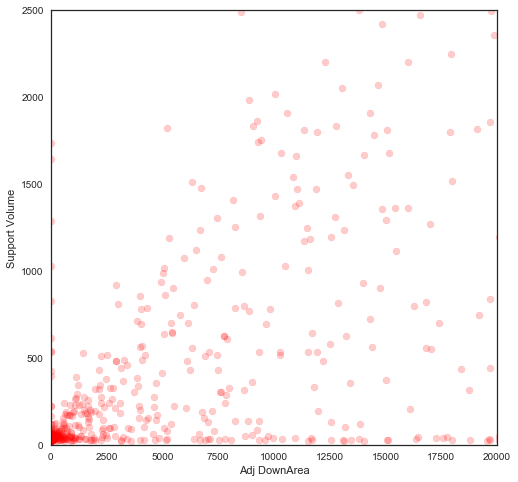

In [166]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
plt.scatter(sd['Adj DownArea'],sd['Vsup'],color='red',alpha=0.2)
xmax=100000
plt.xlim(0,20000)
plt.ylim(0,2500)
plt.xlabel('Adj DownArea')
plt.ylabel('Support Volume')
plt.savefig('Adjusted_DownArea.png')

(0, 2500)

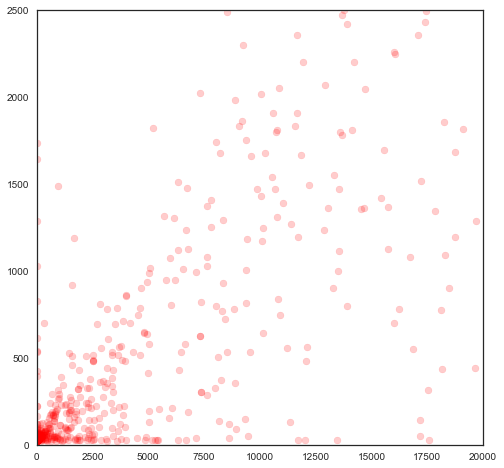

In [167]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
plt.scatter(sd['Adj Ang DownArea'],sd['Vsup'],color='red',alpha=0.2)
xmax=100000
plt.xlim(0,20000)
plt.ylim(0,2500)

(0, 500)

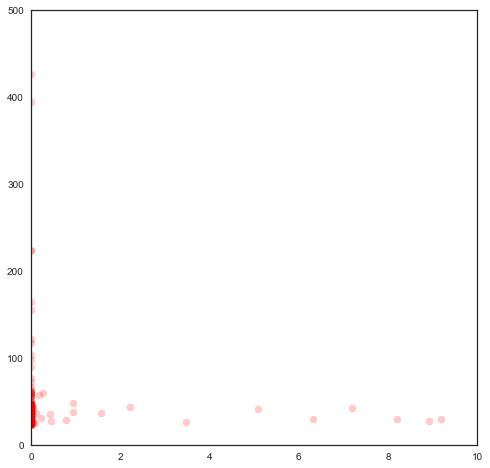

In [168]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
plt.scatter(sd['magic number'],sd['Vsup'],color='red',alpha=0.2)
xmax=100000
plt.xlim(0,10)
plt.ylim(0,500)

(0, 2500)

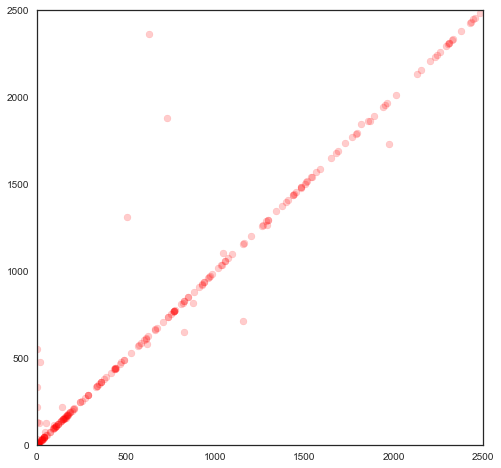

In [130]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
plt.scatter(sd['magic number'],sd['Adj Ang DownArea'],color='red',alpha=0.2)
xmax=100000
plt.xlim(0,2500)
plt.ylim(0,2500)